<a href="https://colab.research.google.com/github/cdavidrios/TDS1_Espectrograma_Int/blob/main/Espectrograma_Interactivo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Espectrograma Interactivo**
**Autores**
* Daniel Escobar Grisales
* Cristian David Ríos Urrego
* Juan Rafael Orozco Arroyave

# Funciones y librerias necesarias

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import ipywidgets as widgets
from IPython.display import display

### Señal original

La figura a continuación muestra la señal en el dominio del tiempo que será objeto de análisis. Esta señal fue construida mediante la concatenación de dos funciones sinusoidales, ambas con amplitud 1, pero con frecuencias diferentes: 50 Hz y 200 Hz, respectivamente.

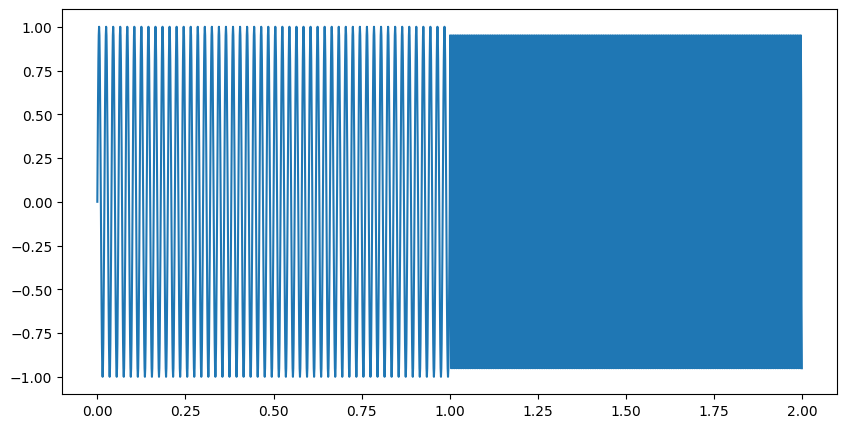

In [6]:
fs = 1000
t = np.linspace(0, 2, 2 * fs, endpoint=False)
x = np.concatenate([np.sin(2 * np.pi * 50 * t[:fs]), np.sin(2 * np.pi * 200 * t[fs:])])

plt.figure(figsize=(10, 5))
plt.plot(t,x)
plt.show()


### Espectrograma

A continuación se presenta el espectrograma de la señal previamente mostrada. En él se puede observar cómo varía la representación espectral al modificar parámetros como la longitud de la ventana (en milisegundos), el valor de NFFT (resolución en frecuencia), el solape entre ventanas (%), y el tipo de ventana utilizada (Hamming, Hanning, Blackman o Boxcar).



In [7]:
def plot_spectrogram(window_ms, nfft, overlap_pct, window):
    nperseg = int(fs * window_ms / 1000)
    noverlap = int(nperseg * overlap_pct / 100)

    if noverlap >= nperseg:
        print("El Overlap debe ser menor que el tamaño de la ventana.")
        return

    f, t_spec, Sxx = signal.spectrogram(x, fs, window=window,
                                        nperseg=nperseg,
                                        noverlap=noverlap,
                                        nfft=nfft)
    plt.figure(figsize=(10, 5))
    plt.pcolormesh(t_spec, f, 10 * np.log10(Sxx + 1e-10), shading='gouraud')
    plt.ylabel('Frecuencia [Hz]')
    plt.xlabel('Tiempo [s]')
    plt.title(f'Espectrograma - Ventana: {window}, Tamaño: {window_ms} ms, Overlap: {overlap_pct}%')
    plt.colorbar(label='[dB]')
    plt.tight_layout()
    plt.show()

In [8]:
# Widgets
window_ms_slider = widgets.IntSlider(value=256 * 1000 // fs, min=10, max=1000, step=10, description='Ventana [ms]')
nfft_slider = widgets.IntSlider(value=512, min=32, max=2048, step=32, description='NFFT')
overlap_slider = widgets.IntSlider(value=50, min=0, max=95, step=5, description='Overlap [%]')
window_dropdown = widgets.Dropdown(options=['hann', 'hamming', 'blackman', 'boxcar'],
                                   value='hann', description='Ventana')

ui = widgets.VBox([window_ms_slider, nfft_slider, overlap_slider, window_dropdown])
out = widgets.interactive_output(plot_spectrogram, {
    'window_ms': window_ms_slider,
    'nfft': nfft_slider,
    'overlap_pct': overlap_slider,
    'window': window_dropdown
})

display(ui, out)

Output()